<center><h1><font style="color:red;">ASSIGNMENT 7</font></h1><br></center>
<h3>

* Name : Achal Rajesh Mate
* Roll No : 2203541
* Enroll No : MITU20BTCSD001
* Branch : CSE
* Class : TY CSE Is - 3
* Guided By : Prof Nagesh Jadhav Sir

<h3><font style="color:red;">Title:- </font>
   Implement KNN Classifier or Regression for any dataset and Calculate the performance matric and compare the error rate with K value( K value range).
</h3>

<h3><font style="color:red;">Objectives:- </font> <br>
1. To learn KNN algorithm
2. To implement KNN classifier
 </h3>

<h3><font style="color:red;">Theory:</font></h3>

#### K-NN algorithm 
* Knn is a Supervised machine learning algorithm that can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
* KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

#### Algorithm
The K-NN working can be explained on the basis of the below algorithm:

* Step-1: Select the number K of the neighbors
* Step-2: Calculate the Euclidean distance of K number of neighbors
* Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
* Step-4: Among these k neighbors, count the number of the data points in each category.
* Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
* Step-6: Our model is ready.

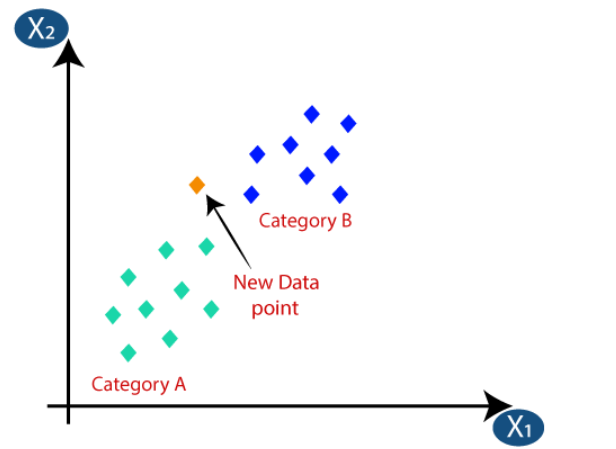


* Firstly, we will choose the number of neighbors, so we will choose the k=5.
* Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:
* 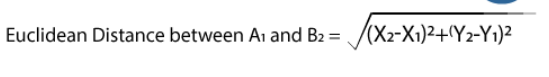

#### Rules to Select K Value
* here is no particular way to determine the best value for "K", so we need to try some values to find the best out of them. The most preferred value for K is 5.
* A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.
* Large values for K are good, but it may find some difficulties.

<b>Problem Statement </b>-  Gender Recognition by Voice.<br>
<b>Dataset Name </b>- Gender Recognition by Voice Dataset.Kaggle<br>
<b>Dataset Link </b> - https://www.kaggle.com/datasets/primaryobjects/voicegender <br>
<b>Dataset Information </b>: <br>
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.. <br>
<b>Features Explanations:</b>
* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female
    

### Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from scipy.stats import norm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score,roc_auc_score
from sklearn import metrics

In [ ]:
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

### Read Dataset

In [ ]:
df =pd.read_csv('voice.csv')

### View Top 5 Rows

In [ ]:
df.head()

### View Last 5 rows

In [ ]:
df.head()

### Dimensions of the Dataset

In [ ]:
df.shape

#### This dataset contains 3168 rows and 21 columns target feature

### Columns in dataset

In [ ]:
df.columns

### Concise Summary

In [ ]:
df.info()

#### From above observation we can say that no null values in the dataset ,but lets varify by using pandas functions


### Check Missing values

In [ ]:
df.isnull().sum()

#### Dataset does not contain any null values

### Check Duplicate Value

In [ ]:
df[df.duplicated()]

#### two duplicate row ,Just Drop That duplicate row

In [ ]:
df.drop(df[df.duplicated()].index,axis=0,inplace=True)

In [ ]:
df.shape

### View Relationship between Data point in dataset

In [ ]:
sns.pairplot(data= df)

#### From above figure we can say that most of datapoints are  not linearly co- related with each other

###  Statistical Summary of data

In [ ]:
df.describe()

### Finding the correlation between variables

In [ ]:
pearsonCorr = df.corr(method='pearson')
spearmanCorr = df.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

In [ ]:
df.label.unique()

### Value count of target variable

In [ ]:
df.label.value_counts()

#### Thus we can see there are equal number of male and female labels

### Label Encoding

In [ ]:
le = LabelEncoder()
df['label'] =le.fit_transform(df['label'])
 

In [ ]:
df.label.unique()

### Model Building

In [ ]:
X =df.drop(['label'], axis =1)
Y = df['label']

### Data  Standardisation


In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)


In [ ]:
X =pd.DataFrame(X,columns=df.columns[:-1])
X.head()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
for k in range(2,11):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    print("K = ",k)
    print('Trainig Accuracy Score: ', neigh.score(X_train,y_train))
    print('Testing Accuracy Score: ', neigh.score(X_test,y_test))
    print('*'*35)

for K =  3 Trainig Accuracy Score:  0.9881516587677726 and Testing Accuracy Score:  0.9794952681388013 is highest Accuracy 

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

In [ ]:
ypred_test = KNN.predict(X_test)
ypred[0:5]

In [ ]:
ypred_train = KNN.predict(X_train)
ypred[0:5]

### Predict of Train Dataset

In [ ]:
Accuracy_train=metrics.accuracy_score(y_train,ypred_train )
precision_train=metrics.precision_score(y_train,ypred_train)
recall_train=metrics.recall_score(y_train,ypred_train)
f1_score_train=metrics.f1_score(y_train,ypred_train)
roc_auc_train=metrics.roc_auc_score(y_train,ypred_train)

In [ ]:
print("Model Name = KNN")
print("Accuracy is =",Accuracy_train)
print("Precision score is =",precision_train)
print("Recall score = ",recall_train)
print("f1 SCore score is = ",f1_score_train)
print("Roc_Auc score is= ",roc_auc_train)

### Predict on X_test

In [ ]:
Accuracy_test=metrics.accuracy_score(y_test,ypred_test)
precision_test=metrics.precision_score(y_test,ypred_test)
recall_test=metrics.recall_score(y_test,ypred_test)
f1_score_test=metrics.f1_score(y_test,ypred_test)
roc_auc_test=metrics.roc_auc_score(y_test,ypred_test)

In [ ]:
print("Model Name = KNN")
print("Accuracy is ",Accuracy_test)
print("Precision score is ",precision_test)
print("Recall _score is",recall_test)
print("f1 SCore score is ",f1_score_test)
print("Roc_Auc score is",roc_auc_test)

### Confusion Matrix

In [ ]:
label=['No','Yes']

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,ypred_test)
row_sum = cm.sum(axis=0)
cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
col_sum = cm.sum(axis=1)
cm = np.append(cm,col_sum.reshape(-1,1),axis=1)
labels = label+['Total']
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
yticklabels=labels,linewidths=3,cbar=None,)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()


### Classification Report

In [ ]:
print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
cr = classification_report(y_test,ypred_test)
print(cr)


### Conclusion

### Thus we have successfully completed the implementation of KNN  Classifier on Voice dataset with 97% accuracy